## Dữ liệu nhiệt độ sôi và áp suất khí quyển

In [1]:
from vplearn.regression import LinearRegrestion
from vplearn.metrics import MSE, MAE, R2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path

# Trong notebook, dùng Path.cwd() thay cho __file__
base_dir = Path.cwd()
print(base_dir)

f:\Learning\ML\examples\02_KNN_and_Linear_Regression


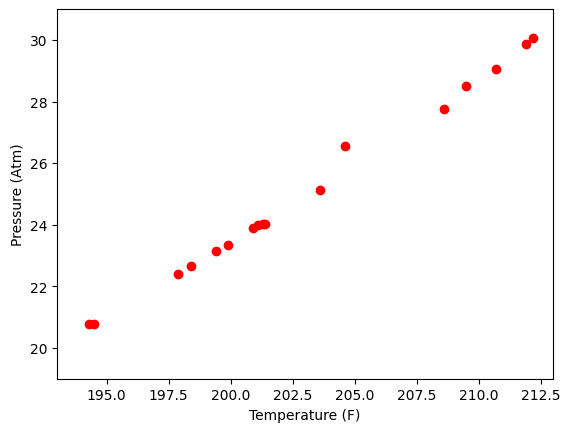

In [2]:
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T

y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T

plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [3]:
data_len = len(X)
X_train = np.array(X[:16])
Y_train = np.array(y[:16])
X_test = np.array(X[16:data_len])
Y_test = np.array(y[16:data_len])

lm = LinearRegrestion()
lm.fit(X_train, Y_train)
preds = lm.predict(X_test)
print(preds)
print(Y_test)

mse = MSE(Y_test, preds)
print(mse)
mae = MAE(Y_test, preds)
print(mae)
r2 = R2(Y_test, preds)
print(r2)

[29.84725252]
[[30.06]]
MSE(0.045261)
MAE(0.212747)
R2(-inf)


F:\Learning\ML\vplearn\metrics\r2.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - ss_res / ss_tot


## Dữ liệu tiêu thụ nhiên liệu 

In [4]:
import math
import numpy as np

data_path = f"{base_dir}\\data\\fuel.txt"
with open(data_path) as f:
    lines = f.readlines()

    x_data = []
    y_data = []
    lines.pop(0)

    for line in lines:
        splitted = line.replace('\n', '').split(',')
        splitted.pop(0)
        splitted = list(map(float, splitted))
        fuel = 1000 * splitted[1] / splitted[5]
        dlic = 1000 * splitted[0] / splitted[5]
        logMiles = math.log2(splitted[3])
        y_data.append([fuel])
        x_data.append([splitted[-1], dlic, splitted[2], logMiles])

    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)

In [5]:
data_len = len(x_data)
X_train = np.array(x_data[:40])
Y_train = np.array(y_data[:40])
X_test = np.array(x_data[40:data_len])
Y_test = np.array(y_data[40:data_len])

lm = LinearRegrestion()
lm.fit(X_train, Y_train)
preds = lm.predict(X_test)
print(preds)
print(Y_test.reshape(-1))

mse = MSE(Y_test, preds)
print(mse)
mae = MAE(Y_test, preds)
print(mae)
r2 = R2(Y_test, preds)
print(r2)

[649.91080195 646.07167308 649.73774387 629.6843171  632.36929804
 650.06180511 595.88545846 604.10563913 625.93251769 605.47408949
 633.96098858]
[711.73305769 697.05277706 638.23106095 681.10013659 591.49994589
 691.02271186 681.03112144 576.06974956 562.4109333  581.79371695
 842.79175243]
MSE(7369.898219)
MAE(68.257881)
R2(-12.278159)


## Dữ liệu SAT_GPA

In [6]:
base_dir = Path.cwd()
print(base_dir)

data_path = f"{base_dir}\\data\\SAT_GPA.csv"
df = pd.read_csv(data_path)
y = df['GPA']
x = df['SAT']

df.describe()

f:\Learning\ML\examples\02_KNN_and_Linear_Regression


,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [7]:
df.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


In [8]:
data_len = len(x)
X_train = np.array(x[:64])
Y_train = np.array(y[:64])
X_test = np.array(x[64:data_len])
Y_test = np.array(y[64:data_len])

lm = LinearRegrestion()
lm.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))
lm.coefficents

[0.8382097630766709, 0.00131838935738351]

Text(0.5, 0, 'SAT')

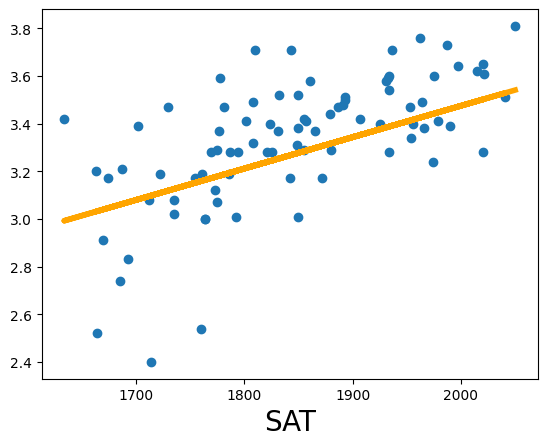

In [9]:
plt.scatter(x,y)
yhat = lm.coefficents[0] + lm.coefficents[1]*x
fig = plt.plot(x,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)

In [10]:
preds = lm.predict(X_test.reshape(-1, 1))

mse = MSE(Y_test, preds)
print(mse)
mae = MAE(Y_test, preds)
print(mae)
r2 = R2(Y_test, preds)
print(r2)

MSE(0.072638)
MAE(0.248804)
R2(-9.667975)


=> Kết quả của Linear Regression tốt hơn của KNN Regression

## Ví dụ 4: Dữ liệu y tế

In [11]:
data_path = f"{base_dir}\\data\\vidu4_lin_reg.txt"
with open(data_path) as f:
    line = f.readline()
    
    df = []
    while line != '':
        line = f.readline().replace('\n', '')
        tokens = line.split(' ')
        array = tokens[1:]
        if array != []:
            df.append(array)
    
    df = np.array(df, dtype=np.float32)

X = df[:, :-1]
y = df[:, -1].reshape(-1, 1)

In [12]:
lm = LinearRegrestion()
lm.fit(X, y)
lm.coefficents

[-0.10802911266969176,
 0.00994694121136094,
 -0.0002065473414930262,
 0.0021813669931696833,
 0.007670102156080549,
 0.038470248673965105]

In [13]:
data_len = len(X)
X_train = np.array(X[:80])
Y_train = np.array(y[:80])
X_test = np.array(X[80:data_len])
Y_test = np.array(y[80:data_len])

lm = LinearRegrestion()
lm.fit(X_train, Y_train)
lm.coefficents

[0.043064346525148955,
 0.008989197147846939,
 -0.00047742425762301033,
 0.0026021798943186266,
 0.008086342654508768,
 0.007085352578792668]

In [14]:
preds = lm.predict(X_test)
preds

array([0.91012272, 0.78452963, 1.2233937 , 0.96085817, 0.96836123,
       1.05009561, 1.19694737, 1.0521678 , 0.99362071, 0.68503543,
       0.78429172, 0.77109844, 1.19748205, 1.06844175, 0.99721921,
       1.03380704, 1.14558206, 1.19228584, 1.29236179, 1.26252547])

In [15]:
Y_test.reshape(-1)

array([0.8 , 0.7 , 1.  , 0.8 , 0.89, 0.6 , 1.5 , 0.7 , 1.1 , 0.81, 0.7 ,
       0.71, 2.7 , 1.13, 1.7 , 0.9 , 1.16, 1.  , 0.97, 2.3 ],
      dtype=float32)

In [16]:
e = preds - Y_test.reshape(-1)
print(f"Mean error: {np.mean(e)}")
print(f"Mean error: {np.var(e)}")

Mean error: -0.07998861349820324
Mean error: 0.22100281606999608


# Ví dụ B.5 (Bài tập 3)

In [17]:
data_path = f"{base_dir}\\data\\real_estate.csv"
df = pd.read_csv(data_path)
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [18]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

data_len = len(X)
X_train = np.array(X[:350])
y_train = np.array(y[:350])
X_test = np.array(X[350:data_len])
y_test = np.array(y[350:data_len])

lm = LinearRegrestion()
lm.fit(X_train, y_train.reshape(-1, 1))


array([[-1.60639862e+04],
       [ 5.40808246e+00],
       [-2.83460787e-01],
       [-4.16272555e-03],
       [ 1.13481785e+00],
       [ 2.56173982e+02],
       [-9.68320052e+00]])

In [19]:
preds = lm.predict(X_test)

mse = MSE(y_test, preds)
print(mse)
mae = MAE(y_test, preds)
print(mae)
r2 = R2(y_test, preds)
print(r2)

MSE(65.189915)
MAE(6.097553)
R2(0.591518)


In [20]:
from vplearn.regression import KNN

knn = KNN()
knn.fit(X_train, y_train, k = 18)
preds = knn.predict(X_test)

mse = MSE(y_test, preds)
print(mse)
mae = MAE(y_test, preds)
print(mae)
r2 = R2(y_test, preds)
print(r2)

MSE(44.038316)
MAE(4.791580)
R2(0.724054)


=> KNN tốt hơn